# Emotional Recognizer
dataset: FER2013


In [1]:
import cv2
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from FERData import FERDataset
import numpy as np
from sklearn.svm import SVC 

In [6]:
train_dataset = FERDataset('./dataset/train') 

# Creazione del dataset di addestramento
X_train = []  # Lista dei vettori di caratteristiche
y_train = []  # Lista delle label corrispondenti

for image, label in train_dataset[0:, ('fear','happy')]:  # dataset è il tuo dataset di immagini e label
    
    # Aggiungi il vettore di caratteristiche e la label alle liste
    X_train.append(image.flatten())
    y_train.append(label)

# Creazione e addestramento del modello SVM
model = SVC(kernel='linear', C=1.0)  # Imposta i parametri del modello

print('Training...')
model.fit(X_train, y_train)  # Addestra il modello



Training...


SVC(kernel='linear')

In [8]:

test_dataset = FERDataset('./dataset/test')

# Valutazione del modello
X_test = []  # Lista dei vettori di caratteristiche del dataset di test
y_test = [] # Lista delle label corrispondenti


for image, label in test_dataset[0:, ('fear', 'happy')]:  # dataset è il tuo dataset di immagini e label
    
    # Aggiungi il vettore di caratteristiche e la label alle liste
    X_test.append(image.flatten())
    y_test.append(label)

print('Accuracy...')
accuracy = model.score(X_test, y_test)  # Calcola l'accuratezza del modello

print('Prediction...')
prediction = model.predict(X_test)  # Esegui la predizione sul dataset di test

Accuracy...
Prediction...


In [9]:
print(prediction)
print(accuracy)

['fear' 'happy' 'happy' ... 'happy' 'happy' 'happy']
0.7126518942101501


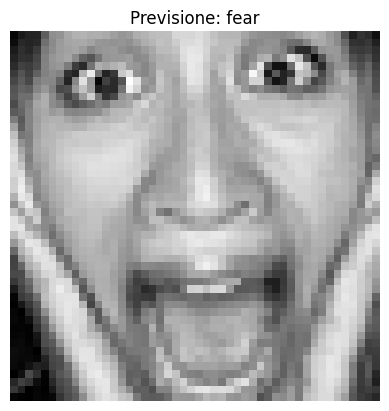

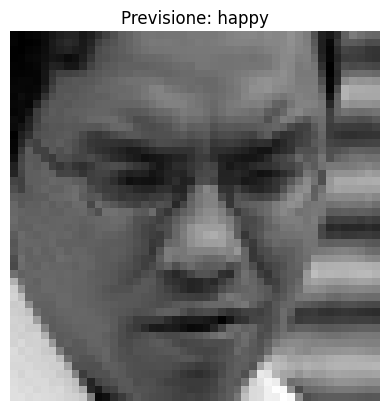

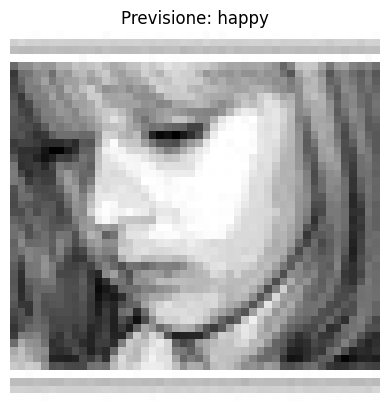

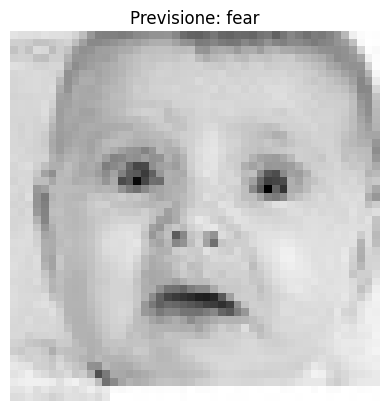

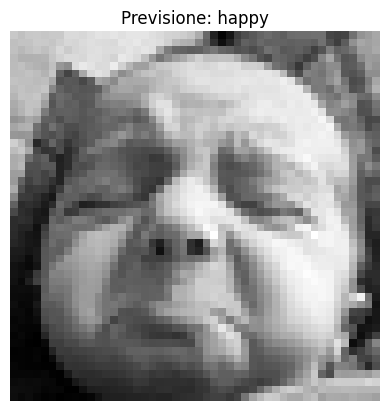

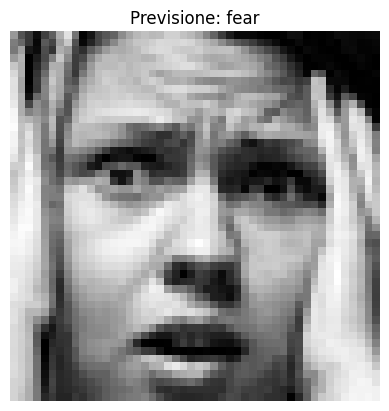

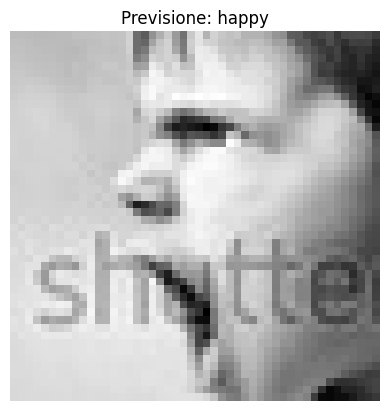

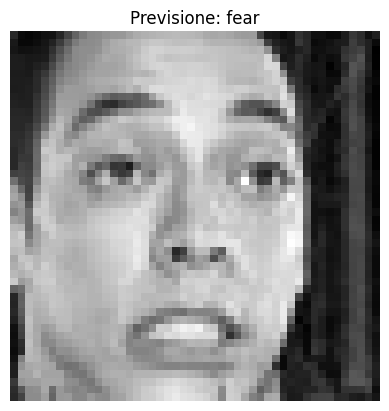

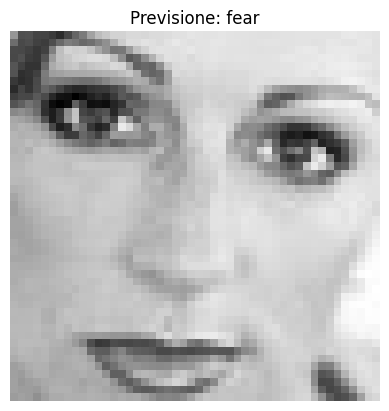

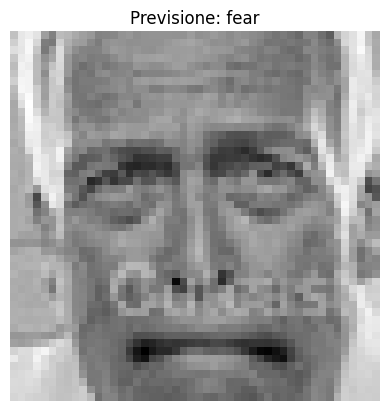

In [10]:

for pred, image in zip(prediction[0:10], test_dataset[0:10, ('fear', 'happy')]):
    plt.figure()
    plt.imshow(image[0], cmap='gray')
    plt.title(f'Previsione: {pred}')
    plt.axis('off')

# Mostra i plot delle immagini
plt.show()